In [1]:
import os
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets, transforms

# Make sure figures folder exists
os.makedirs("figures", exist_ok=True)

# For reproducibility
torch.manual_seed(192)
np.random.seed(192)

print("Setup complete.")

Setup complete.


In [2]:
# Define simple transform for visualization (no normalization yet)
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # smaller for quick visualization
    transforms.ToTensor()
])

data_root = "../data"

gtsrb_train = datasets.GTSRB(
    root=data_root,
    split="train",
    transform=transform,
    download=False
)

print(f"Number of images in train split: {len(gtsrb_train)}")

Number of images in train split: 26640


In [4]:

# Define labels since the data format has no targets
all_labels = []
for i in range(len(gtsrb_train)):
    _, label = gtsrb_train[i]
    all_labels.append(int(label))

unique_labels = sorted(set(all_labels))
num_classes = len(unique_labels)
print(f"Detected number of classes: {num_classes}")
print(f"Unique label IDs: {unique_labels[:15]} ...")

# Class subfolders look like: ./data_gtsrb/GTSRB/Training/Images/00000, 00001, ...
class_root = os.path.join(data_root, "gtsrb", "GTSRB", "Training")
folder_names = sorted([d for d in os.listdir(class_root) if d.isdigit()])

if len(folder_names) == num_classes:
    class_names = folder_names
else:
    # fallback to "Class 0", "Class 1", ...
    class_names = [f"Class {i}" for i in unique_labels]

print(f"Example class names: {class_names[:10]}")

Detected number of classes: 43
Unique label IDs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] ...
Example class names: ['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009']


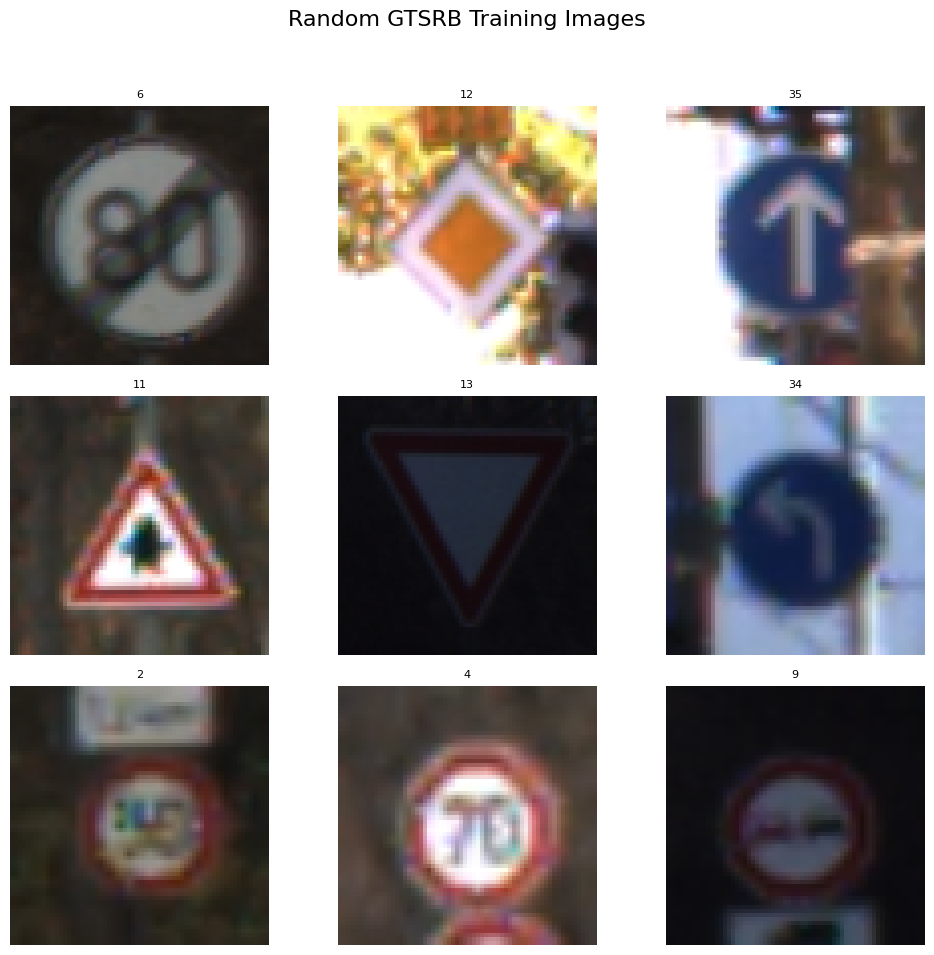

Saved figure: figures/gtsrb_random_samples_grid.pdf


In [5]:
def to_numpy_image(tensor):
    """
    Convert a (C,H,W) tensor in [0,1] to a (H,W,C) numpy array in [0,1].
    Assumes no normalization has been applied beyond ToTensor().
    """
    img = tensor.numpy()
    img = np.transpose(img, (1, 2, 0))  # C,H,W -> H,W,C
    return img

# Sample some random indices
num_samples = 9  # 5x5 grid
indices = np.random.choice(len(gtsrb_train), size=num_samples, replace=False)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle("Random GTSRB Training Images", fontsize=16)

for ax, idx in zip(axes.flatten(), indices):
    img, label = gtsrb_train[idx]
    img_np = to_numpy_image(img)
    ax.imshow(img_np)
    class_name = gtsrb_train.classes[label] if hasattr(gtsrb_train, "classes") else str(label)
    ax.set_title(class_name, fontsize=8)
    ax.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save as PDF
fig.savefig("figures/gtsrb_random_samples_grid.pdf", format="pdf")
print("Saved figure: figures/gtsrb_random_samples_grid.pdf")

In [6]:
label_counts = Counter(all_labels)

print("Class distribution (label_index: count):")
for cls_idx in unique_labels:
    count = label_counts.get(cls_idx, 0)
    class_name = f"Class {cls_idx}"
    print(f"{cls_idx:2d} ({class_name}): {count}")

Class distribution (label_index: count):
 0 (Class 0): 150
 1 (Class 1): 1500
 2 (Class 2): 1500
 3 (Class 3): 960
 4 (Class 4): 1320
 5 (Class 5): 1260
 6 (Class 6): 300
 7 (Class 7): 960
 8 (Class 8): 960
 9 (Class 9): 990
10 (Class 10): 1350
11 (Class 11): 900
12 (Class 12): 1410
13 (Class 13): 1440
14 (Class 14): 540
15 (Class 15): 420
16 (Class 16): 300
17 (Class 17): 750
18 (Class 18): 810
19 (Class 19): 150
20 (Class 20): 240
21 (Class 21): 240
22 (Class 22): 270
23 (Class 23): 360
24 (Class 24): 180
25 (Class 25): 1020
26 (Class 26): 420
27 (Class 27): 180
28 (Class 28): 360
29 (Class 29): 180
30 (Class 30): 300
31 (Class 31): 540
32 (Class 32): 180
33 (Class 33): 480
34 (Class 34): 300
35 (Class 35): 810
36 (Class 36): 270
37 (Class 37): 150
38 (Class 38): 1380
39 (Class 39): 210
40 (Class 40): 240
41 (Class 41): 180
42 (Class 42): 180


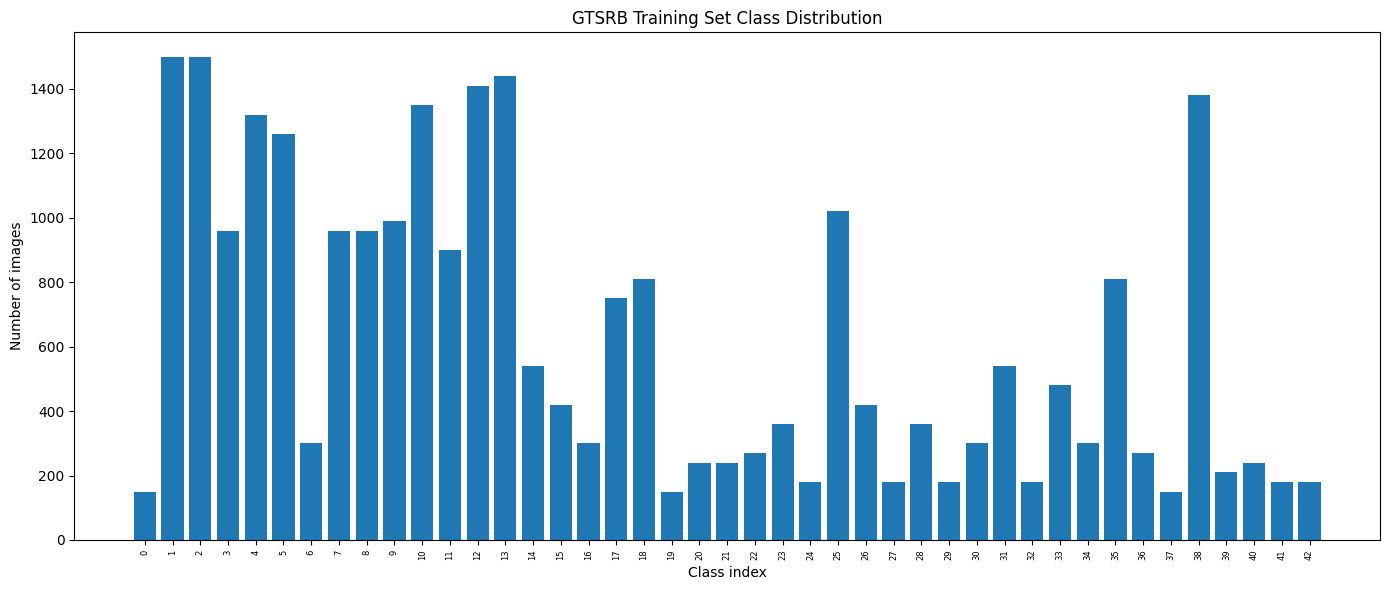

Saved figure: figures/gtsrb_class_distribution.pdf


In [7]:
class_indices = unique_labels
counts = [label_counts.get(i, 0) for i in class_indices]

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(class_indices, counts)
ax.set_xlabel("Class index")
ax.set_ylabel("Number of images")
ax.set_title("GTSRB Training Set Class Distribution")

ax.set_xticks(class_indices)
ax.set_xticklabels(class_indices, rotation=90, fontsize=6)

plt.tight_layout()
plt.show()

# Save figure as PDF
fig.savefig("figures/gtsrb_class_distribution.pdf", format="pdf")
print("Saved figure: figures/gtsrb_class_distribution.pdf")

Collected 43 example images (one per class).


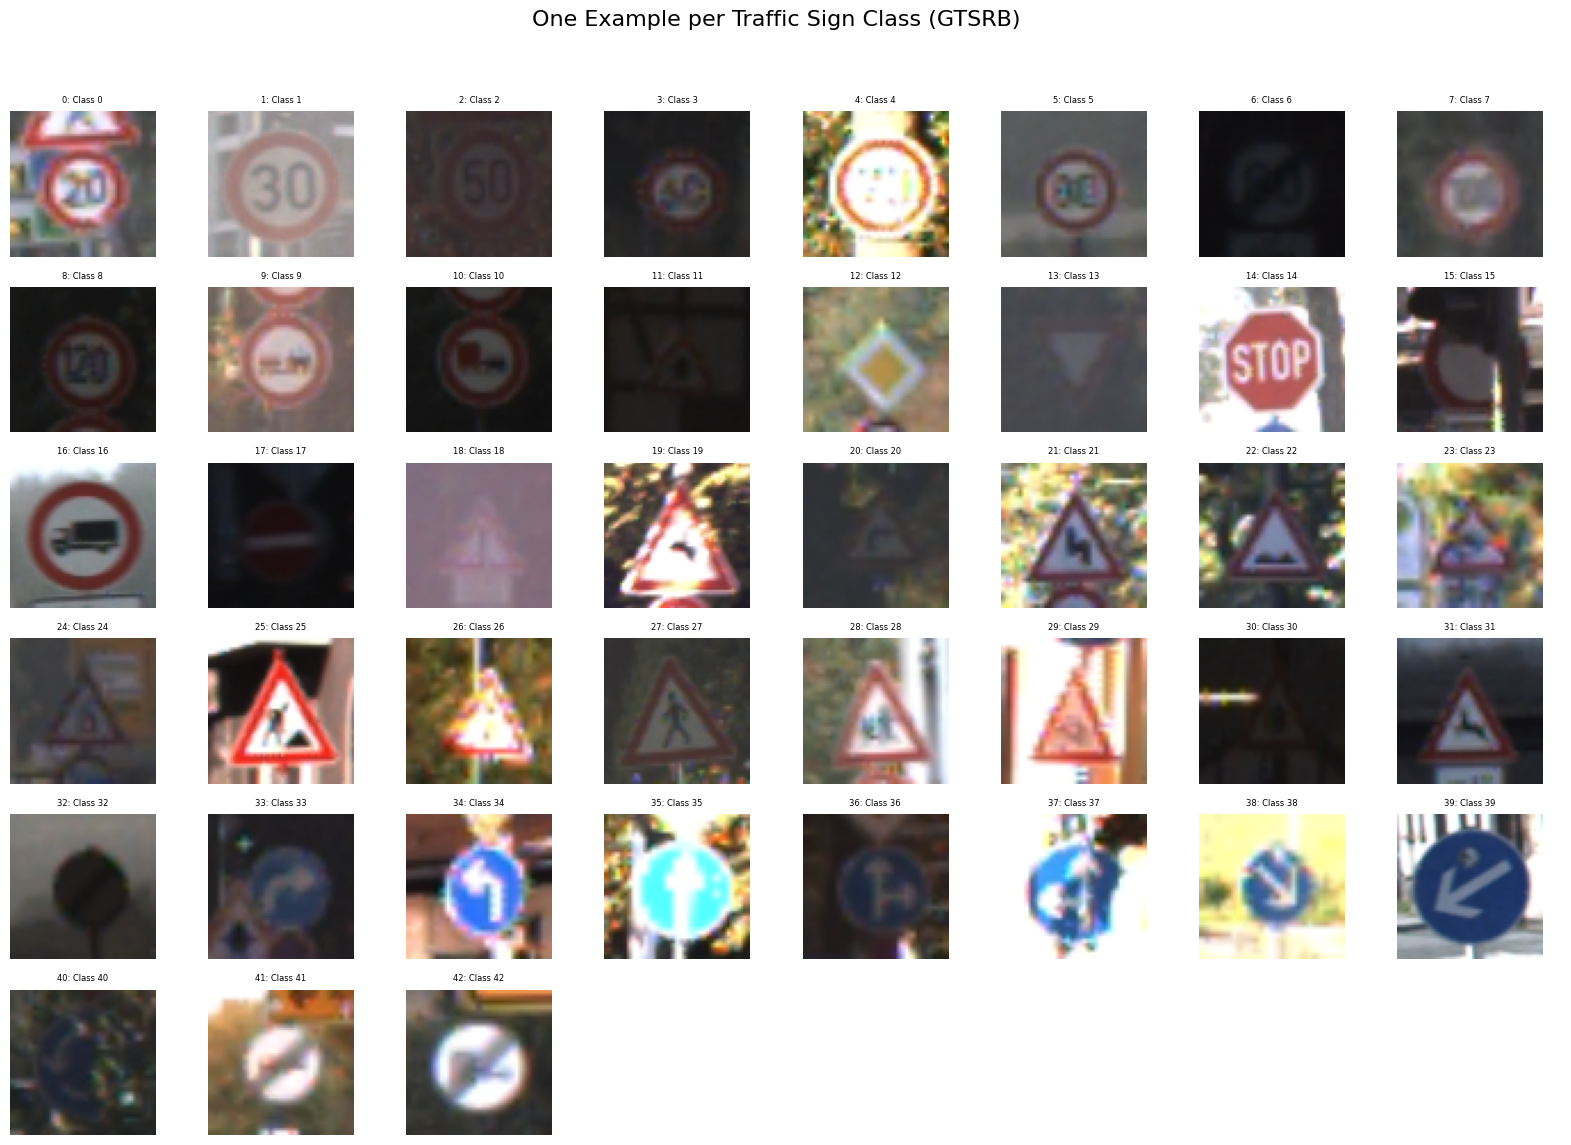

Saved figure: figures/gtsrb_one_example_per_class.pdf


In [8]:
example_indices = {}
for idx in range(len(gtsrb_train)):
    _, label = gtsrb_train[idx]
    label_int = int(label)
    if label_int not in example_indices:
        example_indices[label_int] = idx
    if len(example_indices) == num_classes:
        break

print(f"Collected {len(example_indices)} example images (one per class).")

# Plot them in a grid
grid_cols = 8
grid_rows = int(np.ceil(num_classes / grid_cols))

fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(2*grid_cols, 2*grid_rows))
fig.suptitle("One Example per Traffic Sign Class (GTSRB)", fontsize=16)

axes = axes.flatten()

for i, cls_idx in enumerate(unique_labels):
    ax = axes[i]
    idx = example_indices[cls_idx]
    img, label = gtsrb_train[idx]
    img_np = to_numpy_image(img)
    ax.imshow(img_np)
    class_name = f"Class {cls_idx}"
    ax.set_title(f"{cls_idx}: {class_name}", fontsize=6)
    ax.axis("off")

# Hide unused subplots
for j in range(len(unique_labels), len(axes)):
    axes[j].axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save as PDF
fig.savefig("figures/gtsrb_one_example_per_class.pdf", format="pdf")
print("Saved figure: figures/gtsrb_one_example_per_class.pdf")

In [9]:
gtsrb_class_names = {
     0: "Speed limit (20km/h)",
     1: "Speed limit (30km/h)",
     2: "Speed limit (50km/h)",
     3: "Speed limit (60km/h)",
     4: "Speed limit (70km/h)",
     5: "Speed limit (80km/h)",
     6: "End of speed limit (80km/h)",
     7: "Speed limit (100km/h)",
     8: "Speed limit (120km/h)",
     9: "No passing",
    10: "No passing for vehicles over 3.5t",
    11: "Right-of-way at the next intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Vehicles > 3.5t prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve to the left",
    20: "Dangerous curve to the right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycles crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End of all speed and passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing for vehicles > 3.5t",
}